# WRF-HRRR Computed Dataset Tutorial

## Overview

The WRF-HRRR Computed Dataset, sourced from the [WRF-HRRR model](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/hrrr_download.cgi), contains daily and monthly meteorological parameters, with the former and the latter designed for capturing direct effects of short-term growing season weather variations on crop growth, and for learning indirect impacts of long-term climate change on crop yields, respectively. It contains 9 meteorological parameters gridded at 9 km in a one-day (or one-month) interval. The figures below show the temperature across the U.S. continent in Spring, Summer, Fall, and Winter, respectively.

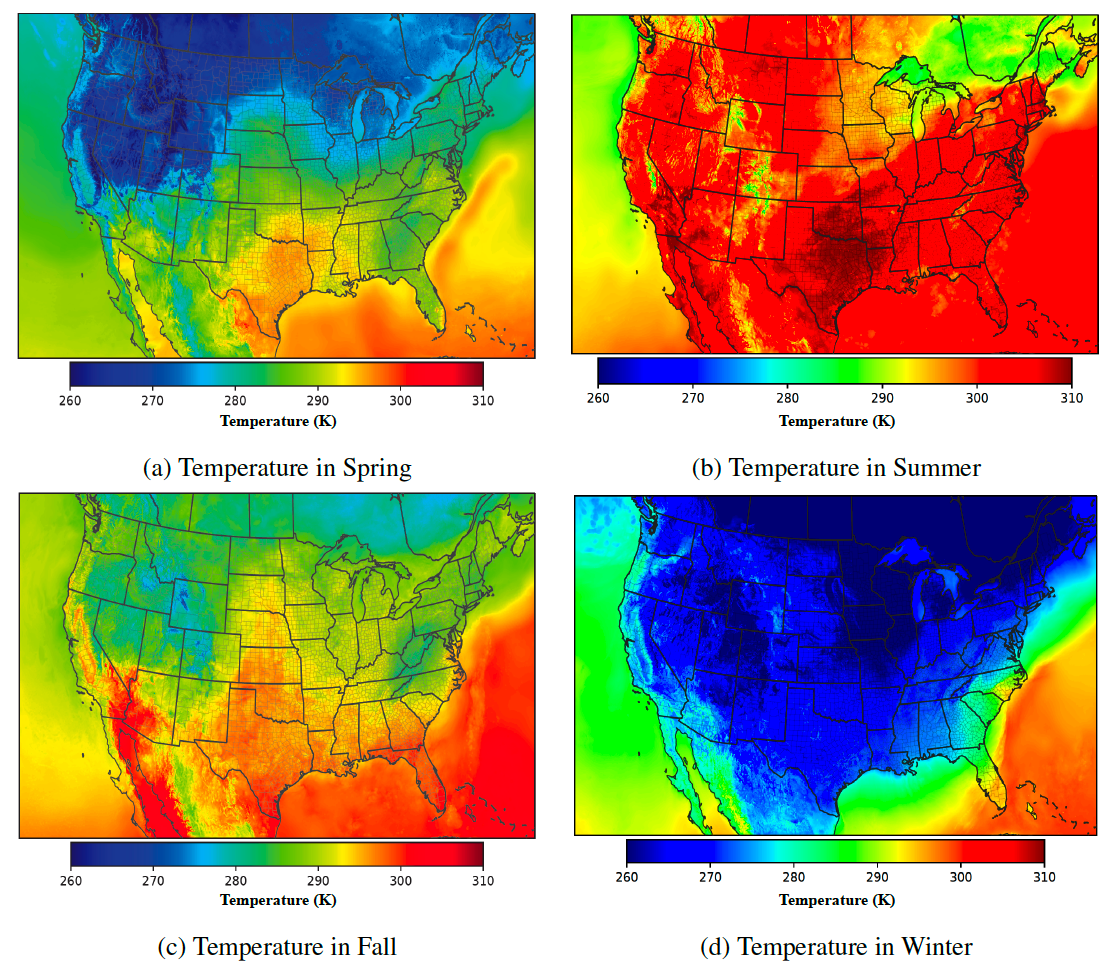

## Data Files

The directory structure is under the following format:
- `CropNet/HRRR/data/<year>/<state abbreviation>/<file name>`
- e.g., CropNet/HRRR/data/2022/AL/HRRR_01_AL_2022-01.csv

The file name is formatted as below:
- `HRRR_<state FIPS>_<state abbreviation>_<year>-<month>.csv`
- e.g., HRRR_01_AL_2022-01.csv

## Data Format

The meteorological parameters in the WRF-HRRR Computed Dataset are stored in the CSV file, with details of column names and their description listed below.


| Column Name                                 | Description                                                  |
| ------------------------------------------- | ------------------------------------------------------------ |
| Year                                        | The year of the data represented, e.g., 2022                 |
| Month                                       | The month of the data represented, e.g, 01                   |
| Day                                         | The day of the data represented, e.g., 01                    |
| Daily/Monthly                               | The type of weather parameters. i.e., daily or monthly weather parameters |
| State                                       | The state of the data represented, e.g., ALABAMA        |
| County                                      | The county of the data represented, e.g., AUTAUGA       |
| FIPS Code                                   | The FIPS code for the U.S. county, e.g., 01001               |
| Grid Index                                  | The index of grids after partitioning one county into 9x9 km grids |
| Lat (llcrnr)                                | The latitude of the lower left corner of the grid, e.g., 32.34 |
| Lon (llcrnr)                                | The longitude of the lower left corner of the grid, e.g., -86.91 |
| Lat (urcrnr)                                | The latitude of the upper right corner of the grid, e.g., 32.46 |
| Lon (urcrnr)                                | The longitude of the upper right corner of the grid, e.g., -86.18 |
| Avg Temperature (K)                         | 2 metre averaged temperature during a day/month. Unit: K     |
| Max Temperature (K)                         | 2 metre maximal temperature during a day/month. Unit: K      |
| Min Temperature (K)                         | 2 metre minimal temperature during a day/month. Unit: K      |
| Precipitation (kg m**-2)                    | Total precipitation. Unit: kg m**-2                          |
| Relative Humidity (%)                       | 2 metre relative humidity. Unit: %                           |
| Wind Gust (m s**-1)                         | Wind gust on the ground. Unit: m s**-1                       |
| Wind Speed  (m s**-1)                       | Wind speed on the groud. Unit: m s**-1                   |
| U Component of Wind (m s**-1)               | The horizontal speed of the air moving towards the East. A negative value indicates wind blowing westward. Unit: m s**-1 |
| V Component of Wind (m s**-1)               | The horizontal speed of the air moving towards the North. A negative value indicated wind blowing towards the south. Unit: m s**-1 |
| Downward Shortwave Radiation Flux (W m**-2) | The total amount of shortwave radiation that reaches the Earth’s surface. Unit: W m**-2 |
| Vapor Pressure Deficit (kPa)                | The amount of drying power the air has upon the plant. Unit: kPa |





## Accessing WRF-HRRR Computed Dataset Data
1. Go to Google Drive [here](https://drive.google.com/drive/folders/1Js98GAxf1LeAUTxP1JMZZIrKvyJStDgz) and download the `HRRR Computed Dataset.zip`
2. Extract the zip file and move it to an appropriate directory, e.g., /mnt/data/CropNet
3. To access the WRF-HRRR data, change the `base_path` below to the directory where you stored the WRF-HRRR data
4. Change the `file_path` below to the particular path you want to visualize

## Examples of WRF-HRRR Computed Dataset

First, we need to install and import reqruied Python libraries.

In [1]:
# install required libraries
!pip install seaborn
!pip install plotly-geo==1.0.0
!pip install geopandas==0.8.1
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.8/962.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20476 sha256=6269cd3763e480c85bd4d8d0e2c420a31f005fa9cec2019fc70f69fb9700656e
  Stored in directory: /root/.cache/pip/wheels/5e/1b/71/a26ff839523f08ed452f967679774ed990af6c55e3dbeb3af3
Successfully built pyshp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.0/223.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shapely: filename=Shapely-1.6.3-py2.py3-none-any.whl size=155975 sha256=ffca52930b3f3ca0b0ad0c7ae1c1535b8ecb9378dfad9f9558c873

In [2]:
# import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
import json
import plotly.express as px

import plotly.figure_factory as ff

# base path for where the WRF-HRRR data has been stored
base_path = "/content/drive/MyDrive/CropNet_Tutorials/input/"

### Example 1: Reading the Data via pandas

In [3]:
# file path for accessing a particular file
file_path = "HRRR/data/2022/AL/HRRR_01_AL_2022-01.csv"

path = os.path.join(base_path, file_path)
df = pd.read_csv(path)

df.head()

,Year,Month,Day,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),...,Max Temperature (K),Min Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),Wind Speed (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2),Vapor Pressure Deficit (kPa)
0,2022,1,1.0,Daily,ALABAMA,AUTAUGA,1001,0.0,32.340803,-86.917595,...,301.218,294.130,0.015,78.8,9.299,6.181,1.113,6.019,2717.9,0.680
1,2022,1,2.0,Daily,ALABAMA,AUTAUGA,1001,0.0,32.340803,-86.917595,...,297.836,286.795,44.044,83.9,9.476,4.003,1.462,2.034,234.9,0.429
2,2022,1,3.0,Daily,ALABAMA,AUTAUGA,1001,0.0,32.340803,-86.917595,...,285.739,274.121,10.555,81.6,11.557,9.861,6.925,-6.421,546.8,0.142
3,2022,1,4.0,Daily,ALABAMA,AUTAUGA,1001,0.0,32.340803,-86.917595,...,285.378,272.304,0.000,78.5,4.403,3.956,-0.871,-1.211,3538.8,0.210
4,2022,1,5.0,Daily,ALABAMA,AUTAUGA,1001,0.0,32.340803,-86.917595,...,289.256,274.308,0.000,83.3,2.393,3.235,0.656,2.695,2874.2,0.220


### Example 2: Visualizing Meteorological Parameters across the United States Continent

In [12]:
# point to the year's directory
directory = "/content/drive/MyDrive/CropNet_Tutorials/input/HRRR/data/2022"

# retrieve the weather data for the whole U.S.
def retrieve_us_data(month = "04"):
  file_template = "2022-{}.csv"
  targeted_month = file_template.format(month)

  all_data = []
  # iterate over the states
  for state_dir in os.listdir(directory):
      state_path = os.path.join(directory, state_dir)

       # iteratore over the files in the dir
      for file in os.listdir(state_path):
        if file.endswith(targeted_month):
          # full path to file
          file_path = os.path.join(state_path, file)
          df = pd.read_csv(file_path)

          # only consifer the monthly data for visualization
          df = df[df["Daily/Monthly"] == "Monthly"]
          # hanlde the fips code
          df["FIPS Code"] = df["FIPS Code"].astype(str).str.zfill(5)
          all_data.append(df)

  # concatenate all dfs into a single one
  us_data = pd.concat(all_data)
  return us_data

# read the data across the U.S. continent
us_data = retrieve_us_data(month = "04")

In [13]:
# visualize the U.S. map
county_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
with urlopen(county_url) as response:
    counties = json.load(response)

fig = px.choropleth(us_data, geojson=counties, locations='FIPS Code', color='Avg Temperature (K)',
                           color_continuous_scale="Jet",
                           range_color=(260, 300),
                           scope="usa",
                           labels={'Avg Temperature (K)':'Temperature (K)'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Example 3: Visulizing Weather Parameters for One U.S. State

In [14]:
# retrieve the meteorological data for one U.S. state
def retrieve_one_state_data(months = [str(i+1) for i in range(12)]):
  all_data = []
  path_template = "HRRR/data/2022/MI/HRRR_26_MI_2022-{}.csv"

  # read the data for targeted months
  for m in months:
    tmp_file_path = path_template.format(m.zfill(2))
    tmp_path = os.path.join(base_path, tmp_file_path)
    data = pd.read_csv(tmp_path)
    all_data.append(data)

  df = pd.concat(all_data)
  df["FIPS Code"] = df["FIPS Code"].astype(str).str.zfill(5)

  state_data = df[df["Daily/Monthly"] == "Monthly"]
  state_data['Relative Humidity (%)'] = state_data['Relative Humidity (%)'].round(2)

  return state_data

# read the data for the given month
state_data = retrieve_one_state_data(months = ["07"])

In [15]:
# visualize relative humidity for one state

def viz_relative_humidity(state_data):
  # get all the fips codes for the targeted state
  fips_code = state_data['FIPS Code'].unique()

  # get the relative humidity values
  values = state_data['Relative Humidity (%)'].values

  # set the colorscale (blue)
  colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
                "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
                "#08519c","#0b4083","#08306b"]

  # set the endpoints
  endpts = list(np.mgrid[min(values):max(values):16j])

  # create the map
  fig = ff.create_choropleth(fips=fips_code, values=values,
                            state_outline={'color': 'rgb(0,0,0)', 'width': 1},
                            county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                            binning_endpoints=endpts, scope=['MI'],
                            title='WRF-HRRR Computed Dataset: 2022-07 Michigan', round_legend_values=True,
                            show_state_data=True, simplify_county=0, simplify_state=0,
                            colorscale=colorscale, legend_title='Relative Humidity (%)')
  fig.layout.template = None

  # display the map
  fig.show()


# visualize the relative humidity
viz_relative_humidity(state_data)


### Example 4: Visualizing Weather Conditions for One U.S. County

In [16]:
# retrive the data for one U.S. county
def retrieve_county_data(FIPS_codes = ["01001"]):
  all_data = []
  path_template = "HRRR/data/2022/AL/HRRR_01_AL_2022-{}.csv"

  # read one year's data
  for m in range(12):
    tmp_file_path = path_template.format(str(m+1).zfill(2))
    tmp_path = os.path.join(base_path, tmp_file_path)
    data = pd.read_csv(tmp_path)
    all_data.append(data)

  df = pd.concat(all_data)
  df["FIPS Code"] = df["FIPS Code"].astype(str).str.zfill(5)

  county_data = df[(df["Daily/Monthly"] == "Monthly") & (df["FIPS Code"].isin(FIPS_codes))]
  county_data['Vapor Pressure Deficit (kPa)'] = county_data['Vapor Pressure Deficit (kPa)'].round(2)

  return county_data


# read the meteorological conditions
county_data = retrieve_county_data()

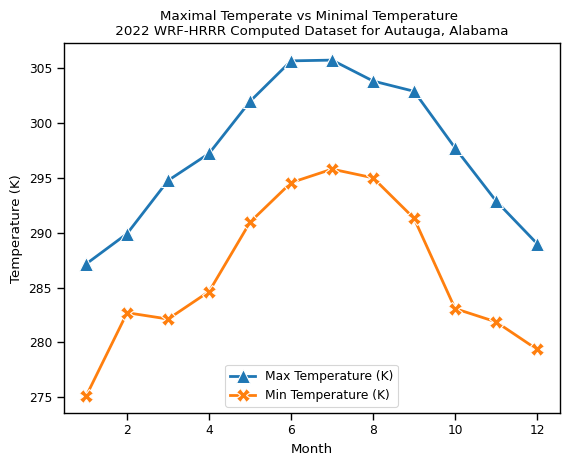

In [17]:
# visualize the maximal and minimal temperate
def viz_max_min_temperature():
  paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}
  sns.set_context("paper", rc = paper_rc)

  # plot maximal temperature
  chart = sns.lineplot(data=county_data, x="Month", y="Max Temperature (K)", label='Max Temperature (K)', marker='^')
  # plot minimal temperature
  sns.lineplot(data=county_data, x="Month", y="Min Temperature (K)", label='Min Temperature (K)', marker='X')

  chart.set_xlabel('Month')
  chart.set_ylabel('Temperature (K)')
  chart.set(title="Maximal Temperate vs Minimal Temperature \n 2022 WRF-HRRR Computed Dataset for Autauga, Alabama ")

  plt.legend(loc='lower center')

# plot the figure
viz_max_min_temperature()

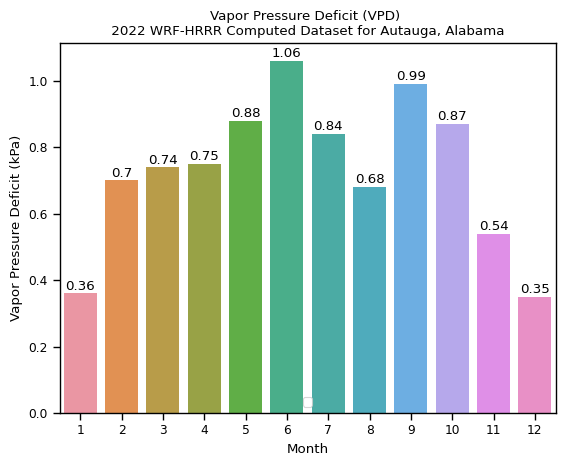

In [18]:
# visualize the vapor pressure deficit (VPD) data
def viz_vpd():
  paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}
  sns.set_context("paper", rc = paper_rc)

  chart = sns.barplot(data=county_data, x="Month", y="Vapor Pressure Deficit (kPa)")
  chart.bar_label(chart.containers[0], padding=0.5)

  chart.set_xlabel('Month')
  chart.set_ylabel('Vapor Pressure Deficit (kPa)')
  chart.set(title="Vapor Pressure Deficit (VPD) \n 2022 WRF-HRRR Computed Dataset for Autauga, Alabama ")

  plt.legend(loc='lower center')

# plot the figure
viz_vpd()